<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span><ul class="toc-item"><li><span><a href="#Load-expression-data-and-metadata" data-toc-modified-id="Load-expression-data-and-metadata-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load expression data and metadata</a></span></li><li><span><a href="#Load-S-and-A-matrices" data-toc-modified-id="Load-S-and-A-matrices-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load S and A matrices</a></span></li></ul></li><li><span><a href="#Exploring-the-S-matrix" data-toc-modified-id="Exploring-the-S-matrix-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploring the S matrix</a></span><ul class="toc-item"><li><span><a href="#Example:-Component-#36" data-toc-modified-id="Example:-Component-#36-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Example: Component #36</a></span></li><li><span><a href="#I-modulon-thresholds" data-toc-modified-id="I-modulon-thresholds-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>I-modulon thresholds</a></span></li><li><span><a href="#Load-gene-annotation" data-toc-modified-id="Load-gene-annotation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Load gene annotation</a></span></li><li><span><a href="#Load-TRN" data-toc-modified-id="Load-TRN-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Load TRN</a></span></li><li><span><a href="#Regulator-enrichments" data-toc-modified-id="Regulator-enrichments-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Regulator enrichments</a></span></li></ul></li><li><span><a href="#Naming-I-modulons" data-toc-modified-id="Naming-I-modulons-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Naming I-modulons</a></span></li><li><span><a href="#Exploring-the-A-matrix" data-toc-modified-id="Exploring-the-A-matrix-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploring the A matrix</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from os.path import join
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from statsmodels.stats.multitest import fdrcorrection

In [2]:
sns.set_style('ticks')

# Load data

## Load expression data and metadata

In [3]:
log_tpm = pd.read_csv(join('data','log_tpm.csv'),index_col=0)
metadata = pd.read_csv(join('data','metadata.csv'),index_col=0)

## Load S and A matrices

$$ \textbf{X} = \textbf{SA} $$

In [4]:
S = pd.read_csv(join('data','S.csv'),index_col=0)
A = pd.read_csv(join('data','A.csv'),index_col=0)

# For now, remove i-modulon names
S.columns = range(len(S.columns))
A.index = range(len(A.index))

**The S matrix**: Gene coefficients/weightings
* Similar to a Principal Component
* PRECISE: ~4000 genes x 92 components
* Most numbers are near zero
* Nonzero values are most interesting

In [5]:
S.shape

(3923, 92)

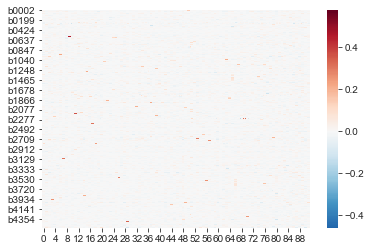

In [6]:
sns.heatmap(S,center=0,cmap='RdBu_r')

In [7]:
S.head()

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
b0002,-0.010888,-0.007717,-0.008502,-0.012186,-0.061489,-0.005599,-0.007377,-0.000795,0.004331,0.001845,...,0.479209,0.035685,0.024778,-0.010660,-0.002123,-0.004416,-0.005428,-0.009219,-0.004345,-0.007838
b0003,-0.011467,0.003042,0.011448,-0.003685,-0.006106,0.006680,-0.043512,0.005107,0.000474,0.007650,...,0.011420,0.040811,0.003324,-0.008424,-0.004415,-0.016126,-0.016476,-0.003497,-0.003583,0.003381
b0004,-0.008693,0.003944,0.012347,-0.008104,0.000585,0.003245,-0.041283,0.006390,0.004260,0.007109,...,0.011339,0.036244,0.003710,-0.005212,0.000700,-0.011096,-0.006140,-0.003155,-0.008418,0.000129
b0005,0.006565,-0.001099,0.009415,-0.008507,0.005399,0.014748,-0.009249,-0.003058,-0.012649,-0.002370,...,-0.015324,0.028972,0.023969,0.000150,0.018497,0.009428,0.001255,-0.006890,-0.028069,0.021534
b0006,-0.006011,0.009889,-0.005555,-0.000152,-0.002454,0.009678,-0.003456,0.002160,-0.001924,-0.000628,...,-0.005661,0.000700,-0.002538,-0.006103,-0.002506,-0.005077,-0.004616,-0.003585,0.001607,0.001285


**The A matrix**: I-modulon activities
* Similar to PC Loadings
* 92 i-modulons x 278 samples
* Contains i-modulon activities
* Value of zero is reference condition (M9 glucose)

In [8]:
A.shape

(92, 278)

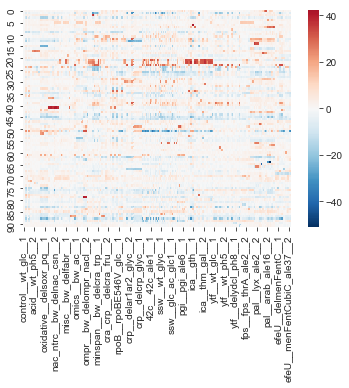

In [9]:
sns.heatmap(A,center=0,cmap='RdBu_r')

In [10]:
A.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
0,0.378690,-0.378690,2.457678,2.248678,-0.327344,-0.259164,1.777251,2.690655,0.656937,0.319583,...,1.041336,2.203940,3.698292,0.856998,1.557323,0.337806,0.943742,1.736640,0.499461,1.581476
1,-0.440210,0.440210,-5.367360,-5.684301,0.131174,0.348843,-4.436389,-4.770469,-1.799113,-1.474222,...,-6.471714,-6.549861,-3.109145,-2.716183,-2.531192,-1.461022,-0.408849,-0.210397,-5.700321,-6.237836
2,0.762258,-0.762258,2.619623,2.900696,3.120724,2.743634,1.989803,1.555835,1.782500,1.530811,...,2.789653,3.959650,1.585147,0.811182,0.300414,2.537535,1.061408,2.634524,0.125513,1.178747
3,-0.289630,0.289630,-10.085719,-13.187916,2.371129,1.861918,-8.708701,-7.881588,-1.237027,-1.235604,...,-11.263744,-10.366813,-0.289217,0.389228,-5.142768,-5.014526,-3.648777,-4.125952,-4.286326,-5.475940
4,0.250770,-0.250770,1.844767,2.055052,0.299345,0.425502,1.801217,1.790987,0.921254,1.410026,...,3.821909,3.306573,2.652394,1.910173,0.927772,1.327549,1.846321,0.909667,2.064662,2.371405


# Exploring the S matrix

## Example: Component #36

In [11]:
# One column of S is a component
S[36].head()

b0002   -0.004708
b0003    0.007967
b0004    0.004028
b0005    0.006701
b0006   -0.003870
Name: 36, dtype: float64

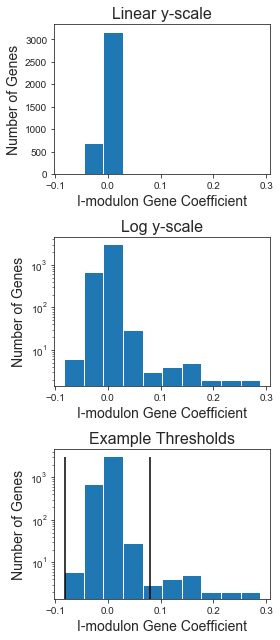

In [12]:
fig,ax = plt.subplots(3,1,figsize=(4,9))

# Linear y-scale shows that most coefficients are near 0
ax[0].set_title('Linear y-scale',fontsize=16)
ax[0].hist(S[36].values)
ax[0].set_xlabel('I-modulon Gene Coefficient',fontsize=14)
ax[0].set_ylabel('Number of Genes',fontsize=14)


# Log y-scale highlights outliers
ax[1].set_title('Log y-scale',fontsize=16)
ax[1].hist(S[36].values)
ax[1].set_yscale('log')
ax[1].set_xlabel('I-modulon Gene Coefficient',fontsize=14)
ax[1].set_ylabel('Number of Genes',fontsize=14)

# Where to draw thresholds?
ax[2].set_title('Example Thresholds',fontsize=16)
ax[2].hist(S[36].values)
ax[2].set_yscale('log')
ax[2].set_xlabel('I-modulon Gene Coefficient',fontsize=14)
ax[2].set_ylabel('Number of Genes',fontsize=14)
ax[2].vlines([-0.08,.08],0,3000)

plt.tight_layout()

## I-modulon thresholds

In [13]:
def compute_threshold(S,k,cutoff=550):
    """Computes kurtosis-based threshold for a component of an S matrix
        S: Component matrix with gene weights
        k: Component name
        cutoff: Minimum test statistic value to determine threshold (550 is default from sensitivity analysis)
    """
    i = 0 
    # Sort genes based on absolute value
    ordered_genes = abs(S[k]).sort_values()
    K,p = stats.normaltest(S.loc[:,k])
    while K > cutoff:
        i -= 1
        # Check if K statistic is below cutoff
        K,p = stats.normaltest(S.loc[ordered_genes.index[:i],k])
    comp_genes = ordered_genes.iloc[i:]
    if len(comp_genes) == len(S.index):
        return max(comp_genes)+.05
    else:
        return np.mean([ordered_genes.iloc[i],ordered_genes.iloc[i-1]])
    
def get_imodulon(S,k,annotation=None,trn=None):
    """
    Returns pandas dataframe containing i-modulon genes and coefficients.
    
    Parameters:
        S: Component matrix with gene weights
        k: I-modulon name
        show_info: Show extended information about each gene
        show_regs: Show known regulators for each gene (separated by commas)
    """
    
    if k not in S.columns:
        raise ValueError('{} is not a valid i-modulon name. See S.index'.format(name))
    
    comp = S[k]
    thresh = compute_threshold(S,k)
    genes = comp[abs(comp) > thresh].sort_values(ascending=False)
    
    if annotation is None: 
        df = pd.DataFrame(genes)
    else:
        df = gene_info.loc[genes.index]
        df['coefficient'] = genes.values
    
    if trn is not None:
        for gene in genes.index:
            df.loc[gene,'regulators'] = ','.join(trn[trn.gene_id==gene].regulator.tolist())
    return df

In [14]:
get_imodulon(S,36)

,36
b3941,0.288795
b4013,0.272038
b3828,0.229074
b0260,0.216009
b3829,0.210910
b0600,0.206409
b0599,0.176938
b0199,0.176367
b3939,0.165735
b2942,0.159666


## Load gene annotation

In [15]:
gene_info = pd.read_csv(join('data','gene_info.csv'),index_col=0)

In [16]:
gene_info.head()

,start,stop,strand,gene_name,length,operon,cog,Product
b0001,189,255,+,thrL,66,thrLABC,No COG Annotation,<i>thr</i> operon leader peptide
b0002,336,2799,+,thrA,2463,thrLABC,Amino acid transport and metabolism,fused aspartate kinase/homoserine dehydrogenase 1
b0003,2800,3733,+,thrB,933,thrLABC,Amino acid transport and metabolism,homoserine kinase
b0004,3733,5020,+,thrC,1287,thrLABC,Amino acid transport and metabolism,THRESYN-MONOMER
b0005,5233,5530,+,yaaX,297,yaaX,Function unknown,DUF2502 domain-containing protein YaaX


## Load TRN

In [17]:
trn = pd.read_csv(join('data','TRN.csv'),index_col=0)

In [18]:
trn.tail()

,regulator,gene_id
8320,csqR,b3882
8321,csqR,b3881
8322,csqR,b3880
8323,csqR,b3883
8324,csqR,b3884


In [19]:
# Also includes riboswitches 
# TPP = thiamine, FMN = flavin mononucleotide
trn.head()

,regulator,gene_id
0,FMN,b3041
1,L-tryptophan,b3708
2,L-tryptophan,b3709
3,TPP,b0066
4,TPP,b0067


In [25]:
get_imodulon(S,36,annotation=gene_info,trn=trn)

,start,stop,strand,gene_name,length,operon,cog,Product,coefficient,regulators
b3941,4132615,4133506,+,metF,891,metF,Amino acid transport and metabolism,"5,10-methylenetetrahydrofolate reductase",0.288795,"metJ,rpoD"
b4013,4214279,4215209,+,metA,930,metA,Amino acid transport and metabolism,homoserine <i>O</i>-succinyltransferase,0.272038,"metJ,rpoD,rpoH"
b3828,4011862,4012816,-,metR,954,metR,Transcription,DNA-binding transcriptional dual regulator MetR,0.229074,"metJ,metR,nac,oxyR"
b0260,275324,276728,+,mmuP,1404,mmuPM,Amino acid transport and metabolism,B0260-MONOMER,0.216009,
b3829,4013052,4015314,+,metE,2262,metE,Amino acid transport and metabolism,HOMOCYSMET-MONOMER,0.210910,"cra,metJ,metR,nac,oxyR"
b0600,633585,634746,+,ybdL,1161,ybdL,Amino acid transport and metabolism,"methionine-oxo-acid transaminase, PLP-dependent",0.206409,
b0599,632388,633477,-,ybdH,1089,hcxA,Energy production and conversion,hydroxycarboxylate dehydrogenase A,0.176938,
b0199,221613,222645,-,metN,1032,metNIQ,Inorganic ion transport and metabolism,L-methionine/D-methionine ABC transporter ATP ...,0.176367,"fnr,hypT,metJ,rpoD"
b3939,4128671,4129832,+,metB,1161,metBL,Amino acid transport and metabolism,<i>O</i>-succinylhomoserine(thiol)-lyase / <i>...,0.165735,"hypT,metJ,phoP,rpoD"
b2942,3086705,3087860,+,metK,1155,metK,Coenzyme transport and metabolism,methionine adenosyltransferase,0.159666,"crp,fnr,gadX,lrp,metJ,rpoD"


## Regulator enrichments

In [20]:
def get_regulon(regulator,trn):
    """
    Parses regulators (for / and + operators) and returns the genes in the regulon.
    
    "/" indicates an OR relation (i.e. union of regulons)
    "+" indicates an AND relation (i.e. intersection of regulons)
    
    Parameters:
        regulator: Name of regulator (see imodulons.regulator)
        trn: TRN dataframe
    """
    
    if '/' in regulator:
        regs = regulator.split('/')
        genes = set()
        for reg in regs:
            genes = genes.union(trn[trn.regulator == reg].gene_id.tolist())
        return sorted(genes)
        
    elif '+' in regulator:
        regs = regulator.split('+')
        genes = trn[trn.regulator.isin(regs)].gene_id.tolist()
        return sorted(genes)
    else:
        return trn[trn.regulator == regulator].gene_id.tolist()

def compute_enrichment(S,k,regulator,trn):
    
    """
    Calculates the enrichment of a regulator (see get_regulon) in an i-modulon
    
    Parameters:
        S: Component matrix with gene weights
        k: I-modulon name
        regulator:
        trn: TRN dataframe
    """
        
    regulon = set(get_regulon(regulator,trn))
    imodulon = set(get_imodulon(S,k).index)
    all_genes = set(S.index)
    
    # Compute contingency
    ((tp,fp),(fn,tn)) = contingency(regulon,imodulon,all_genes)
    
    # Handle edge cases
    if tp == 0:
        res = [1,0,0,0]
    elif fp == 0 and fn == 0:
        res = [0,1,1,len(imodulon)]
    else:
        odds,pval = stats.fisher_exact([[tp,fp],[fn,tn]],alternative='greater')
        recall = np.true_divide(tp,tp+fn)
        precision = np.true_divide(tp,tp+fp)
        res = [pval,recall,precision,tp]
    return pd.Series(res,index=['pvalue','recall','precision','TP'],
                     name=regulator)

def contingency(set1,set2,all_genes):
    """Creates contingency table for gene enrichment
        set1: Set of genes (e.g. regulon)
        set2: Set of genes (e.g. i-modulon)
        all_genes: Set of all genes
    """
        
    tp = len(set1 & set2)
    fp = len(set2 - set1)
    tn = len(all_genes - set1 - set2)
    fn = len(set1 - set2)
    return [[tp,fp],[fn,tn]]

def fdr(enrich,alpha=1e-5):
    return enrich[fdrcorrection(enrich.pvalue,alpha=1e-5)[0]].sort_values('pvalue')

In [21]:
compute_enrichment(S,36,'metJ',trn)

pvalue       2.007782e-25
recall       7.333333e-01
precision    6.470588e-01
TP           1.100000e+01
Name: metJ, dtype: float64

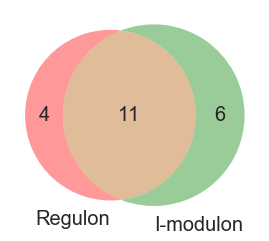

In [22]:
venn = venn2((set(get_regulon('metJ',trn)),set(get_imodulon(S,36).index)),
             set_labels=('Regulon','I-modulon'))
for text in venn.set_labels:
    text.set_fontsize(20)
for text in venn.subset_labels:
    text.set_fontsize(20)

In [23]:
list2struct = []
for tf in trn.regulator.unique():
    list2struct.append(compute_enrichment(S,36,tf,trn))
enrichments = pd.DataFrame(list2struct)

In [24]:
fdr(enrichments,alpha=1e-5)

,pvalue,recall,precision,TP
metJ,2.007782e-25,0.733333,0.647059,11.0
hypT,1.010282e-09,0.384615,0.294118,5.0


# Naming I-modulons

In [137]:
S = pd.read_csv(join('data','S.csv'),index_col=0)
A = pd.read_csv(join('data','A.csv'),index_col=0)

DF_imodulons = pd.read_csv(join('data','curated_enrichments.csv'),index_col=0)

In [139]:
DF_imodulons.head()

,regulator,f1score,pvalue,precision,recall,TP,n_genes,n_tf,Category,threshold
name,,,,,,,,,,
AllR/AraC/FucR,allR/araC/fucR,0.750000,1.190000e-41,1.000000,0.600000,18.0,18,3,Carbon Source Utilization,0.086996
ArcA-1,arcA,0.130952,6.420000e-20,0.660000,0.072687,33.0,50,1,Energy Metabolism,0.058051
ArcA-2,arcA,0.087683,1.150000e-16,0.840000,0.046256,21.0,25,1,Energy Metabolism,0.081113
ArgR,argR,0.177778,6.030000e-18,0.923077,0.098361,12.0,13,1,Amino Acid and Nucleotide Biosynthesis,0.080441
AtoC,atoC,0.800000,1.520000e-12,0.666667,1.000000,4.0,6,1,Miscellaneous Metabolism,0.105756


In [140]:
A.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
AllR/AraC/FucR,0.378690,-0.378690,2.457678,2.248678,-0.327344,-0.259164,1.777251,2.690655,0.656937,0.319583,...,1.041336,2.203940,3.698292,0.856998,1.557323,0.337806,0.943742,1.736640,0.499461,1.581476
ArcA-1,-0.440210,0.440210,-5.367360,-5.684301,0.131174,0.348843,-4.436389,-4.770469,-1.799113,-1.474222,...,-6.471714,-6.549861,-3.109145,-2.716183,-2.531192,-1.461022,-0.408849,-0.210397,-5.700321,-6.237836
ArcA-2,0.762258,-0.762258,2.619623,2.900696,3.120724,2.743634,1.989803,1.555835,1.782500,1.530811,...,2.789653,3.959650,1.585147,0.811182,0.300414,2.537535,1.061408,2.634524,0.125513,1.178747
ArgR,-0.289630,0.289630,-10.085719,-13.187916,2.371129,1.861918,-8.708701,-7.881588,-1.237027,-1.235604,...,-11.263744,-10.366813,-0.289217,0.389228,-5.142768,-5.014526,-3.648777,-4.125952,-4.286326,-5.475940
AtoC,0.250770,-0.250770,1.844767,2.055052,0.299345,0.425502,1.801217,1.790987,0.921254,1.410026,...,3.821909,3.306573,2.652394,1.910173,0.927772,1.327549,1.846321,0.909667,2.064662,2.371405


# Exploring the A matrix

See the metadata table for detailed information about each experiment

In [141]:
A.loc['MetJ'].head()

control__wt_glc__1    -0.106342
control__wt_glc__2     0.106342
fur__wt_dpd__1        10.653125
fur__wt_dpd__2         8.413443
fur__wt_fe__1         -0.371773
Name: MetJ, dtype: float64

Text(0, 0.5, 'MetJ I-modulon Activity')

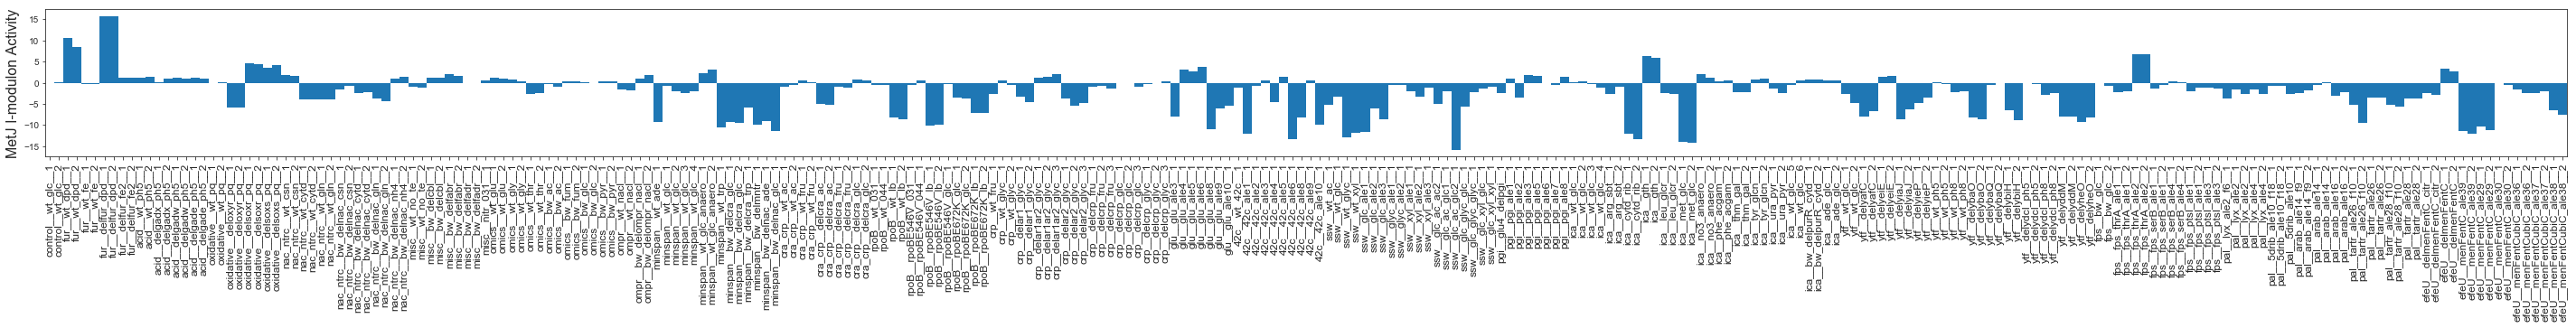

In [142]:
fig,ax = plt.subplots(figsize=(50,3))
ax.bar(range(A.shape[1]),A.loc['MetJ'],width=1,linewidth=0)
ax.set_xlim([-0.5,A.shape[1]-0.5])
ax.set_xticks(range(A.shape[1]))
ax.set_xticklabels(A.columns,rotation=90,fontsize=12)
ax.set_ylabel('MetJ I-modulon Activity',fontsize=16)